In [0]:
# Time Series Analysis of SAFARICOM Shares Prices with LSTM using Python's Keras Library
# The dataset used xontains Safaricom share prices from 2012 - June 2019

In [2]:
# Import the necessary libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,5

from matplotlib.lines import Line2D

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler(feature_range=(0, 1))

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from datetime import datetime

Using TensorFlow backend.


In [3]:
vTicker = 'NSE_SCOM_Safaricom'

# Load data into dataframe
data = pd.read_csv('NSE_SCOM_Safaricom.csv')

#print the head
data.sample(5)

,Date,Open,High,Low,Close,Vol.,Change %
1393,08-01-2018,27.5,28.25,27.50,28.00,6.87M,0.00%
590,17-10-2014,12.5,12.50,12.00,12.15,3.33M,-2.80%
1650,17-01-2019,23.9,24.00,23.55,23.75,5.58M,-0.21%
569,18-09-2014,12.5,12.70,12.50,12.60,6.21M,0.80%
60,04-09-2012,3.9,4.00,3.85,3.95,12.05M,1.28%


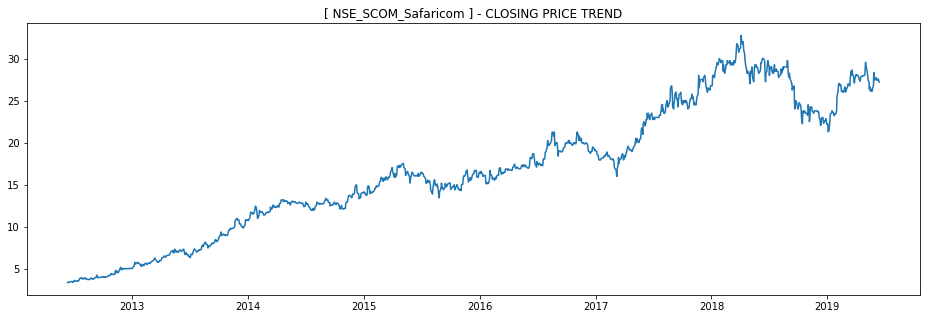

In [4]:
# Format date and make it the index
data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
data.index = data['Date']

# Plot the Close Price Trend
plt.plot(data['Close'])
plt.title('[ ' + vTicker + ' ] - CLOSING PRICE TREND')
plt.show()

In [5]:
# Create new dataframe with just Date & Close price
close_data = data.copy()
close_data = close_data.drop(['Open', 'High', 'Low', 'Vol.', 'Change %', 'Date'], axis=1)
close_data.sample(5)

,Close
Date,
2013-06-13,7.30
2019-06-07,27.40
2015-08-31,14.40
2019-02-18,26.05
2015-09-15,15.15


In [6]:
# Split the data into 70% train, 30% test
vCount = round( close_data.shape[0] * 0.7 )

dataset = close_data.values

train = dataset[0:vCount,:]
test = dataset[vCount:,:]

close_data.shape, train.shape, test.shape

((1753, 1), (1227, 1), (526, 1))

In [0]:
# Transform the training data
scaler = MinMaxScaler(feature_range = (0, 1))
training_data = scaler.fit_transform(train)

In [8]:
# Create features set, labels then create learning model
features_set = []
labels = []

for i in range(60, train.shape[0]):
    features_set.append(training_data[i-60:i, 0])
    labels.append(training_data[i, 0])

features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
1167/1167 [==============================] - 6s 5ms/step - loss: 0.0480
Epoch 2/100
1167/1167 [==============================] - 5s 4ms/step - loss: 0.0066
Epoch 3/100
1167/1167 [==============================] - 5s 4ms/step - loss: 0.0064
Epoch 4/100
1167/1167 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 5/100
1167/1167 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 6/100
1167/1167 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 7/100
1167/1167 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 8/100
1167/1167 [==============================] - 5s 5ms/step - loss: 0.0045
Epoch 9/100
1167/1167 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 10/100
1167/1167 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 11/100
1167/1167 [==============================] - 5s 4ms/step - loss: 0.0036
Epoch 12/100
1167/1167 [==============================] - 5s 4ms/step - lo

In [0]:
# Create features set, labels for testing
test_inputs = close_data[len(close_data) - len(test) - 60:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

test_features = []
for i in range(60, test_inputs.shape[0]):
    test_features.append(test_inputs[i-60:i, 0])
    
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


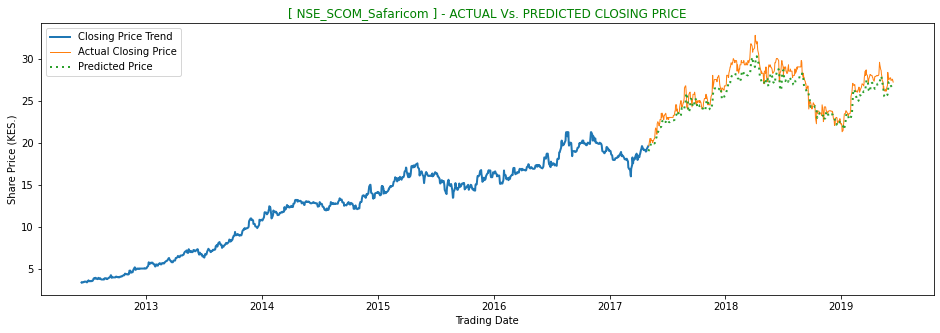

<Figure size 1152x360 with 0 Axes>

In [10]:
# Plotting the actual vs the predicted prices
train = close_data[:vCount]
test = close_data[vCount:]

test['Predictions'] = predictions
plt.plot(train['Close'], label='Closing Price Trend', lw=2)

plt.plot(test['Close'], label='Actual Closing Price', lw=1)
plt.plot(test['Predictions'], dashes=[1, 2], label='Predicted Price', lw=2)

plt.title('[ ' + vTicker + ' ] - ACTUAL Vs. PREDICTED CLOSING PRICE').set_color('green')
plt.ylabel('Share Price (KES.)')
plt.xlabel('Trading Date')

plt.legend()
plt.show()
plt.savefig("scom_actual_vs_predicted_close_price.png")